In [1]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\ML_PATH_EE297\\EE297_env\\01_main'

In [2]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\ML_PATH_EE297\\EE297_env\\01_main'

In [3]:
pwd

'C:\\Users\\Baron\\Desktop\\EE_297_Repo\\EE_297\\ML_PATH_EE297\\EE297_env\\01_main'

### Preliminary Software Design and Nueral Network
    Understanding the Dataset
    Figure out simple multitask head git repos

    This is the End Game!


### Part a) Preliminary Setup
    1. Import Necessary Libraries
    2. Import the Dataset

In [6]:
#1. Import Necessary Liobraries
import pandas as pd
import numpy as np
from PIL import Image
from tqdm import tqdm
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Input, AveragePooling2D, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1


from keras.optimizers import Adam
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedKFold
from sklearn.utils import shuffle
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import seaborn as sns

In [7]:
#2. Import the Dataset
##  Baron's Path
signs_dataset = r"C:\Users\Baron\Documents\Grad_School\EE_297A\Project\datasets\signs"

#Construct the Dataset

# Define your target classes
target_classes = [0, 1, 9, 12, 13, 14, 17, 26, 27, 28]

# Map each class to an index: 0–9
class_id_to_index = {class_id: idx for idx, class_id in enumerate(target_classes)}

signs_df = pd.read_csv(f"{signs_dataset}/Train.csv", delimiter = ",")

# Filter to only desired classes
signs_df = signs_df[signs_df["ClassId"].isin(target_classes)]

# Construct full file paths (without moving/copying any image)
signs_df["full_path"] = signs_df["Path"].apply(lambda p: os.path.join(signs_dataset, p))

# Apply to your DataFrame
signs_df["LabelIndex"] = signs_df["ClassId"].map(class_id_to_index)



### Part B) Dataset Description and Visualizaton

    1. General Info
    2. Describing the Dataset
    3. Head of the Dataset
    4. Describing the characteristicts of the images
    4. Creating General Dataframes (For later use)
    5. Plot of the Widths and Heights for preprocessing

In [9]:
#1. General Info
signs_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11430 entries, 360 to 31349
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Width       11430 non-null  int64 
 1   Height      11430 non-null  int64 
 2   Roi.X1      11430 non-null  int64 
 3   Roi.Y1      11430 non-null  int64 
 4   Roi.X2      11430 non-null  int64 
 5   Roi.Y2      11430 non-null  int64 
 6   ClassId     11430 non-null  int64 
 7   Path        11430 non-null  object
 8   full_path   11430 non-null  object
 9   LabelIndex  11430 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 982.3+ KB


In [47]:
#signs_df.describe()

In [11]:
#3. Head of the Dataset (Used to see a quick glimpse of the dataset)
signs_df.head(120)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,full_path,LabelIndex
360,29,30,5,6,24,25,0,Train/0/00000_00000_00000.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,0
361,30,30,5,5,25,25,0,Train/0/00000_00000_00001.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,0
362,30,30,5,5,25,25,0,Train/0/00000_00000_00002.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,0
363,31,31,5,5,26,26,0,Train/0/00000_00000_00003.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,0
364,30,32,5,6,25,26,0,Train/0/00000_00000_00004.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,0
...,...,...,...,...,...,...,...,...,...,...
475,70,69,6,7,64,62,0,Train/0/00000_00003_00025.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,0
476,76,75,6,6,70,69,0,Train/0/00000_00003_00026.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,0
477,85,84,8,8,78,76,0,Train/0/00000_00003_00027.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,0
478,94,93,8,9,86,85,0,Train/0/00000_00003_00028.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,0


In [71]:
print(signs_df.iloc[360]["full_path"])

C:\Users\Baron\Documents\Grad_School\EE_297A\Project\datasets\signs\Train/1/00001_00005_00000.png


In [12]:
print(list(map(int, sorted(signs_df["ClassId"].unique()))))
target_classes

[0, 1, 9, 12, 13, 14, 17, 26, 27, 28]


[0, 1, 9, 12, 13, 14, 17, 26, 27, 28]

In [13]:
gtsrb_legend = {
    0: "Speed limit (20)",
    1: "Speed limit (30)",
    9: "No passing",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    17: "No entry",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing"
}

In [1]:
# Get sorted list of unique bird species
unique_classes = signs_df['ClassId'].unique()
num_classes = len(unique_classes)
step = 20

for i in range(0, num_classes, step):
    subset = unique_classes[i:i+step]
    plt.figure(figsize=(12, 5))
    sns.histplot(data=signs_df[signs_df['ClassId'].isin(subset)],
                 x='ClassId', bins=step, kde=False)
    plt.xticks(rotation=90)
    plt.title(f"Image Count for the signs dataset {i+1} to {i+step}")
    plt.ylabel("Number of Images")
    plt.tight_layout()
    plt.show()

NameError: name 'signs_df' is not defined

In [2]:
class_counts = signs_df["ClassId"].value_counts().sort_index()
print(class_counts)

NameError: name 'signs_df' is not defined

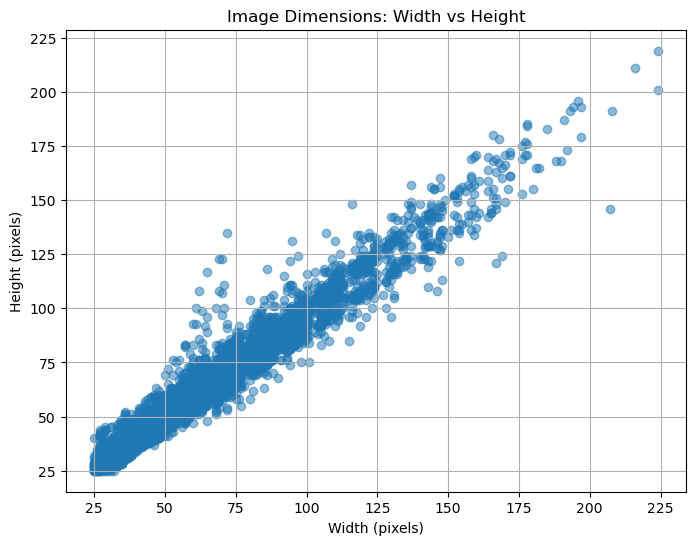

In [16]:
# Lists to hold width and height values
widths = []
heights = []

# Loop through all images
for path in signs_df["full_path"]:
    try:
        with Image.open(path) as img:
            width, height = img.size
            widths.append(width)
            heights.append(height)
    except Exception as e:
        print(f"Skipped {path}: {e}")

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.5)
plt.title("Image Dimensions: Width vs Height")
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.grid(True)
plt.show()

### Part C) Image Set Preprocessing

In [18]:
original_dir_train = os.path.join(signs_dataset, 'Train')
original_dir_test = os.path.join(signs_dataset, 'Test') 

processed_dir_train = os.path.join(signs_dataset, 'Train_p')
processed_dir_test = os.path.join(signs_dataset, 'Test_p')

### Part D) Baseline Model Training
    Contents include the prototyping of different pretained models
    1.) ResNet18
    2.) MobileNet
    3.) Yolov7

In [21]:
#Establish the Model Import:
import torch.nn as nn
import torchvision.models as models
import torch

class SignOnlyNet(nn.Module):
    def __init__(self, num_classes):
        super(SignOnlyNet, self).__init__()

        # Pretrained ResNet18 backbone
        resnet = models.resnet18(weights=True)
        self.encoder = nn.Sequential(*list(resnet.children())[:-2])  # Output: (B, 512, 7, 7)

        # Traffic sign classification head
        self.class_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        features = self.encoder(x)
        out = self.class_head(features)
        return out

In [22]:
# Create the model
num_classes = 10  # You filtered the GTSRB dataset to 10 classes
model = SignOnlyNet(num_classes)

C:\Users\Baron\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [23]:
# Dataset Class
from torch.utils.data import Dataset
from PIL import Image
import torch

class SignDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "full_path"]
        label = int(self.df.loc[idx, "LabelIndex"])
        
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label

In [24]:
from torchvision import transforms
from torch.utils.data import DataLoader

# Use ImageNet normalization for ResNet
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Create dataset and loader
sign_dataset = SignDataset(signs_df, transform=transform)
sign_loader = DataLoader(sign_dataset, batch_size=32, shuffle=True)

In [25]:
device = torch.device("cpu")

In [26]:
## Initialize the Model
model = SignOnlyNet(num_classes=10)  # You have 10 traffic sign classes
model = model.to(device)  # Send to GPU or CPU

In [27]:
import torch.nn as nn
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3)

In [31]:
from sklearn.model_selection import train_test_split
from torch.utils.data import Subset

# 80% train, 20% validation split
train_indices, val_indices = train_test_split(
    list(range(len(sign_dataset))), test_size=0.2, random_state=42)

train_subset = Subset(sign_dataset, train_indices)
val_subset = Subset(sign_dataset, val_indices)

train_loader = DataLoader(train_subset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=32, shuffle=False)

In [33]:
num_epochs = 5

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    avg_train_loss = running_loss / len(train_loader)

    # 🔍 VALIDATION
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    val_accuracy = 100 * correct / total

    # 📊 Print results
    print(f"Epoch [{epoch+1}/{num_epochs}] "
          f"Train Loss: {avg_train_loss:.4f} | "
          f"Val Loss: {avg_val_loss:.4f} | "
          f"Val Acc: {val_accuracy:.2f}%")

Epoch [1/5] Train Loss: 0.0816 | Val Loss: 0.4241 | Val Acc: 93.04%
Epoch [2/5] Train Loss: 0.0142 | Val Loss: 0.0006 | Val Acc: 100.00%
Epoch [3/5] Train Loss: 0.0142 | Val Loss: 0.0098 | Val Acc: 99.74%
Epoch [4/5] Train Loss: 0.0031 | Val Loss: 0.0010 | Val Acc: 99.96%
Epoch [5/5] Train Loss: 0.0234 | Val Loss: 0.0047 | Val Acc: 99.83%


In [39]:
torch.save(model.state_dict(), "models/sign_classifier_weights.pth")

### Part E) Baseline Model Analyzing Test Data


In [79]:
### Importing the Test Values
##  Baron's Path
signs_dataset = r"C:\Users\Baron\Documents\Grad_School\EE_297A\Project\datasets\signs"

#Construct the Dataset

# Define your target classes
target_classes = [0, 1, 9, 12, 13, 14, 17, 26, 27, 28]

# Map each class to an index: 0–9
class_id_to_index = {class_id: idx for idx, class_id in enumerate(target_classes)}

signs_df_test = pd.read_csv(f"{signs_dataset}/Test_p.csv", delimiter = ",")

# Filter to only desired classes
signs_df_test = signs_df_test[signs_df_test["ClassId"].isin(target_classes)]

# Construct full file paths (without moving/copying any image)
signs_df_test["full_path"] = signs_df_test["Path"].apply(lambda p: os.path.join(signs_dataset, p))

# Apply to your DataFrame
signs_df_test["LabelIndex"] = signs_df_test["ClassId"].map(class_id_to_index)


In [81]:
#3. Head of the Dataset (Used to see a quick glimpse of the dataset)
signs_df_test.head(120)


,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path,full_path,LabelIndex
1,42,45,5,5,36,40,1,Test_p/00001.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,1
7,32,33,5,5,26,28,12,Test_p/00007.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,3
10,38,37,6,5,33,32,12,Test_p/00010.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,3
15,27,27,6,6,22,22,9,Test_p/00015.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,2
18,35,35,5,6,30,29,27,Test_p/00018.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,8
...,...,...,...,...,...,...,...,...,...,...
392,40,38,5,5,35,33,28,Test_p/00392.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,9
394,48,49,5,5,43,44,1,Test_p/00394.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,1
399,47,42,6,5,42,37,12,Test_p/00399.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,3
403,43,44,5,5,38,39,0,Test_p/00403.png,C:\Users\Baron\Documents\Grad_School\EE_297A\P...,0


In [85]:
# Print the value in column 'LabelIndex' for row at index 5
print(signs_df_test.iloc[0]["full_path"])

C:\Users\Baron\Documents\Grad_School\EE_297A\Project\datasets\signs\Test_p/00001.png


In [149]:
# Extract the row indices
indices = signs_df_test.index.to_list()

# Convert to a numpy array for reshaping
indices_array = np.array(indices)

# Define how many columns per row in your printed grid
cols = 10  # You can change this (e.g. 5, 8, etc.)
rows = (len(indices_array) + cols - 1) // cols  # ceiling division

# Pad the array if needed
pad_size = rows * cols - len(indices_array)
if pad_size > 0:
    indices_array = np.append(indices_array, [''] * pad_size)

# Reshape and print as a grid
indices_matrix = indices_array.reshape(rows, cols)
for row in indices_matrix:
    print('  '.join(f"{str(i):>3}" for i in row))

  1    7   10   15   18   22   24   26   28   31
 35   37   43   51   53   54   57   58   63   65
 66   69   75   76   89   91   93   94   98  100
110  111  116  118  119  120  122  128  132  133
144  154  157  160  165  166  167  169  170  172
175  178  187  192  199  200  201  203  204  205
208  215  223  224  225  226  231  236  240  241
243  248  251  252  255  257  261  264  265  273
279  280  283  284  285  288  289  290  292  295
297  299  300  303  307  314  318  326  342  348
349  350  353  354  360  362  369  374  375  377
378  381  387  388  389  392  394  399  403  411
413  417  418  423  425  426  431  434  441  445
450  454  456  463  467  468  473  475  479  486
488  489  490  491  497  502  508  517  521  523
525  530  533  534  543  545  546  547  548  549
552  553  556  558  560  564  568  574  578  579
580  583  591  593  599  605  608  609  610  612
617  621  622  623  625  626  629  638  639  642
645  646  648  651  652  654  657  658  661  664
666  667  674  675  

In [151]:
# Use ImageNet normalization for ResNet

# Create dataset and loader
sign_dataset = SignDataset(signs_df_test, transform=transform)
sign_loader = DataLoader(sign_dataset, batch_size=32, shuffle=True)

In [153]:
# -------- Define the model class again --------
class SignOnlyNet(nn.Module):
    def __init__(self, num_classes):
        super(SignOnlyNet, self).__init__()
        resnet = models.resnet18(weights=True)
        self.encoder = nn.Sequential(*list(resnet.children())[:-2])
        self.class_head = nn.Sequential(
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten(),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        features = self.encoder(x)
        out = self.class_head(features)
        return out

In [155]:
# -------- Define Dataset for test images --------
class SignDataset(Dataset):
    def __init__(self, dataframe, transform=None):
        self.df = dataframe.reset_index(drop=True)
        self.transform = transform

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        img_path = self.df.loc[idx, "full_path"]
        label = int(self.df.loc[idx, "LabelIndex"])
        image = Image.open(img_path).convert("RGB")
        if self.transform:
            image = self.transform(image)
        return image, label

In [157]:
# -------- Define transform (same as training) --------
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

In [159]:
# -------- Load the model and weights --------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = SignOnlyNet(num_classes=10)  # same number of classes as during training
model.load_state_dict(torch.load("models/sign_classifier_weights.pth"))
model = model.to(device)
model.eval()

C:\Users\Baron\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Baron\AppData\Local\Temp\ipykernel_11760\550255514.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no lon

SignOnlyNet(
  (encoder): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [162]:
# Original GTSRB class IDs and their labels
original_legend = {
    0: "Speed limit (20)",
    1: "Speed limit (30)",
    9: "No passing",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    17: "No entry",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing"
}

# Mapping of new indices (used in your model) to original class IDs
target_classes = [0, 1, 9, 12, 13, 14, 17, 26, 27, 28]

# Print remapping
print("NewIndex | OriginalID | Description")
print("------------------------------------------")
for new_idx, orig_id in enumerate(target_classes):
    label = original_legend[orig_id]
    print(f"{new_idx:^9} | {orig_id:^11} | {label}")

NewIndex | OriginalID | Description
------------------------------------------
    0     |      0      | Speed limit (20)
    1     |      1      | Speed limit (30)
    2     |      9      | No passing
    3     |     12      | Priority road
    4     |     13      | Yield
    5     |     14      | Stop
    6     |     17      | No entry
    7     |     26      | Traffic signals
    8     |     27      | Pedestrians
    9     |     28      | Children crossing


In [207]:
# -------- Run Inference and Calculate Accuracy --------
correct = 0
total = 0
all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in sign_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        # Collect predictions and labels
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

        # Accuracy tracking
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

accuracy = 100 * correct / total
print(f"Test Accuracy: {accuracy:.2f}%")

Test Accuracy: 99.54%


In [212]:
### Indivdual Test
import random

# Flatten indices_matrix and remove empty strings (if any)
flat_indices = [int(i) for row in indices_matrix for i in row if str(i).strip() != ""]

# Pick a random index from the valid ones
index = random.choice(flat_indices)

print(f"Randomly selected index: {index}")

Randomly selected index: 7294


In [214]:
#   Load image and label from the test dataframe
img_path = signs_df_test.loc[index, "full_path"]
true_label = signs_df_test.loc[index, "LabelIndex"]  # remapped label index
image = Image.open(img_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)  # add batch dim

#   Put model in evaluation mode and predict
model.eval()
with torch.no_grad():
    output = model(input_tensor)
    _, predicted = torch.max(output, 1)
    predicted_label = predicted.item()

#   Use your remapped legend
gtsrb_legend_remapped = {
    0: "Speed limit (20)",
    1: "Speed limit (30)",
    2: "No passing",
    3: "Priority road",
    4: "Yield",
    5: "Stop",
    6: "No entry",
    7: "Traffic signals",
    8: "Pedestrians",
    9: "Children crossing"
}
#   Display the result
print(f"Image Path: {img_path}")
print(f"True Label Index   : {true_label} -> {gtsrb_legend_remapped[true_label]}")
print(f"Predicted Index    : {predicted_label} -> {gtsrb_legend_remapped[predicted_label]}")
print("  Correct Prediction!" if predicted_label == true_label else "❌ Incorrect Prediction!")

Image Path: C:\Users\Baron\Documents\Grad_School\EE_297A\Project\datasets\signs\Test_p/07294.png
True Label Index   : 5 -> Stop
Predicted Index    : 5 -> Stop
  Correct Prediction!


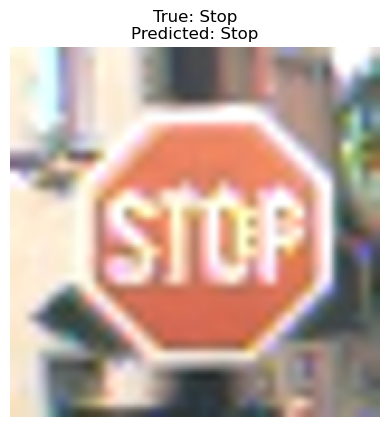

In [216]:
# Choose index of test image

# Load image and label
row = signs_df_test.loc[index]
image = Image.open(row["full_path"]).convert("RGB")
true_label = int(row["LabelIndex"])  # Ensure it's an int

# Show result
plt.imshow(image)
plt.axis("off")
plt.title(f"True: {gtsrb_legend_remapped[true_label]}\nPredicted: {gtsrb_legend_remapped[predicted_label]}")
plt.show()

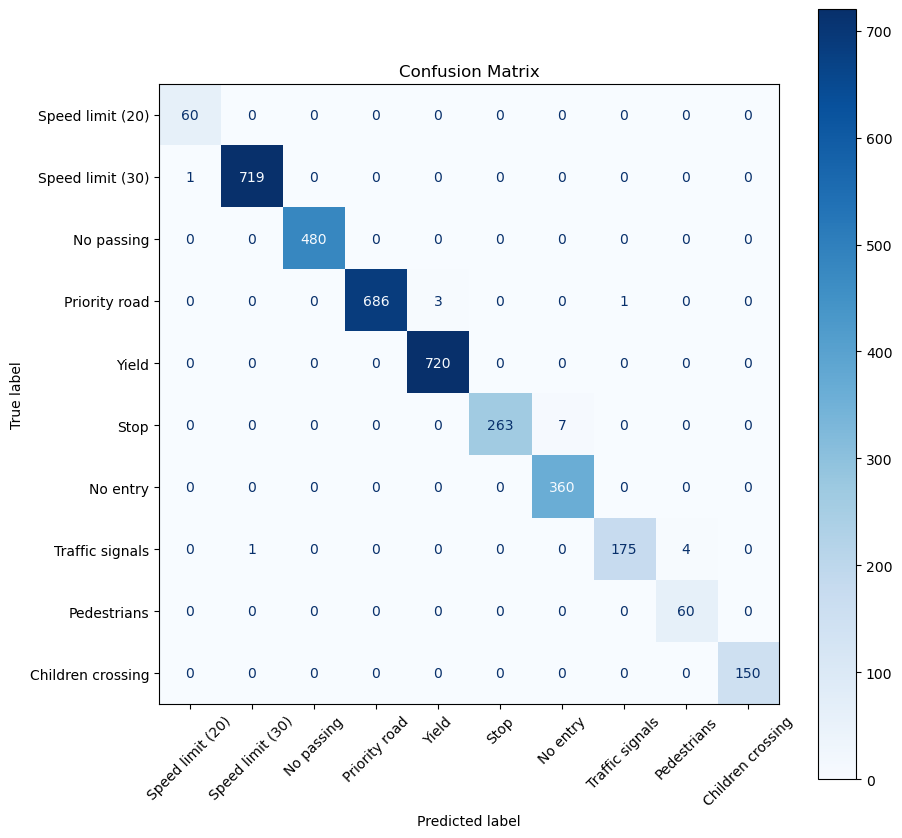

In [218]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Define class names
class_names = [
    "Speed limit (20)", "Speed limit (30)", "No passing", "Priority road",
    "Yield", "Stop", "No entry", "Traffic signals", "Pedestrians", "Children crossing"
]

# Compute and display confusion matrix
cm = confusion_matrix(all_labels, all_preds)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax, cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()